In [15]:
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np

In [17]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA

from sklearn.metrics import mean_squared_error, silhouette_score

In [18]:
cols = ['#1FC17B', '#78FECF', '#555B6E', '#CC998D', '#429EA6',
        '#153B50', '#8367C7', '#EE6352', '#C287E8', '#F0A6CA',
        '#521945', '#361F27', '#828489', '#9AD2CB', '#EBD494',
        '#53599A', '#80DED9', '#EF2D56', '#446DF6', '#AF929D']

In [20]:
X, y = make_blobs(n_features=50, centers=20, n_samples=20000, cluster_std=0.2,
                  random_state=17, center_box=(-1, 1)) #one error fixed in file Auto-Encoder_Demo6.
                  #The center_box parameter in the make_blobs function expects a tuple, but a list ([-1, 1]) is provided.
                  #The fix is in changing the list to a tuple by replacing the square brackets with parentheses: center_box=(-1, 1).  Now code is working.


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=17)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Text(0.5, 1.0, 'PCA Results')

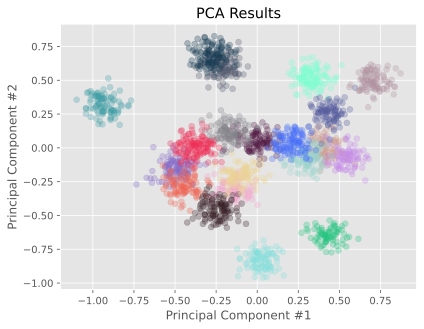

In [22]:
pca = PCA(n_components=2)
pca.fit(X_train)

res_pca = pca.transform(X_test)

unique_labels = np.unique(y_test)

for index, unique_label in enumerate(unique_labels):
    X_data = res_pca[y_test==unique_label]
    plt.scatter(X_data[:,0], X_data[:,1], alpha=0.3, c=cols[index])

plt.xlabel('Principal Component #1')
plt.ylabel('Principal Component #2')
plt.title('PCA Results')

In [23]:
autoencoder = MLPRegressor(alpha=1e-15,
                           hidden_layer_sizes=(50, 100, 50, 2, 50, 100, 50),
                           random_state=1, max_iter=20000)

autoencoder.fit(X_train, X_train)

MLPRegressor(alpha=1e-15, hidden_layer_sizes=(50, 100, 50, 2, 50, 100, 50),
             max_iter=20000, random_state=1)

In [24]:
W = autoencoder.coefs_
biases = autoencoder.intercepts_

In [25]:
encoder_weights = W[0:4]
encoder_biases = biases[0:4]

In [26]:
def encoder(encoder_weights, encoder_biases, data):
    res_ae = data
    for index, (w, b) in enumerate(zip(encoder_weights, encoder_biases)):
        if index+1 == len(encoder_weights):
            res_ae = res_ae@w+b
        else:
            res_ae = np.maximum(0, res_ae@w+b)
    return res_ae

res_ae = encoder(encoder_weights, encoder_biases, X_test)

Text(0.5, 1.0, 'Autoencoder Results')

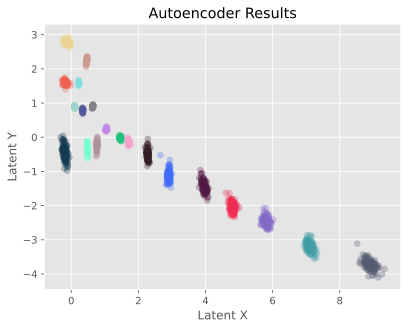

In [27]:
unique_labels = np.unique(y_test)

for index, unique_label in enumerate(unique_labels):
    latent_space = res_ae[y_test==unique_label]
    plt.scatter(latent_space[:,0], latent_space[:,1], alpha=0.3, c=cols[index])

plt.xlabel('Latent X')
plt.ylabel('Latent Y')
plt.title('Autoencoder Results')

In [ ]:
silhouette_score(X_train, y_train)

0.6109772034818249

In [ ]:
silhouette_score(res_pca, y_test)

0.36786645647283706

In [ ]:
silhouette_score(res_ae, y_test)

0.8074659602052925